In [2]:
import numpy as np
import scipy.stats as stats

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


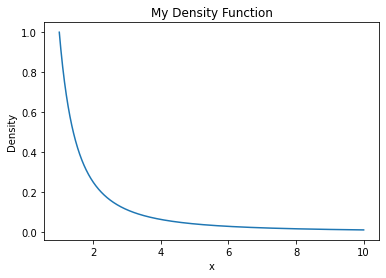

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def my_density(x, etta):
    # Define your own density function here
    return (etta - 1) / x ** etta

def my_function(x, etta):
    # Define your own density function here
    return x ** (1 - etta)

# Generate x values
x = np.linspace(1, 10, 1000)

# Generate y values (density at each x)
y = my_density(x, 2)

# Create the plot
plt.plot(x, y)
plt.title('My Density Function')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

In [4]:
# Generation of sample
np.random.seed(0)
etta = 2

n = 100
sample = np.random.uniform(0, 1, n)
sample = (1 - sample) ** (1 / (1 - etta))

confidence = 0.95
x1 = (1 - confidence) / 2
x2 = (1 + confidence) / 2

In [5]:
med = np.median(sample)
med

1.8778762919676302

In [7]:
# Bootstrap resampling parametric
B = 100000  # Number of bootstrap samples
bootstrap_samples = np.random.choice(sample, (B, n), replace=True)

# Estimate of t is the minimum value of the distribution
bootstrap_t_estimates = n / np.sum(np.log(bootstrap_samples), axis=1) + 1

# Calculate mean and CI for t
ci_lower_t = np.round(np.percentile(bootstrap_t_estimates, 2.5), 4)
ci_upper_t = np.round(np.percentile(bootstrap_t_estimates, 97.5), 4)

length_boot_param = np.round(ci_upper_t - ci_lower_t, 4)

print(f'Bootstrap 95% Confidence Interval for t: ({ci_lower_t}, {ci_upper_t})')
print("Length: ", length_boot_param)

Bootstrap 95% Confidence Interval for t: (1.8998, 2.3472)
Length:  0.4474


In [12]:
# Bootstrap resampling parametric
B = 100000  # Number of bootstrap samples
bootstrap_samples = np.random.choice(sample, (B, n), replace=True)

est = n / np.sum(np.log(sample)) + 1

# Estimate of t is the minimum value of the distribution
bootstrap_t_estimates = n / np.sum(np.log(bootstrap_samples), axis=1) + 1 - est

# Calculate mean and CI for t
ci_upper_t = np.round(est - np.percentile(bootstrap_t_estimates, 2.5), 4)
ci_lower_t = np.round(est - np.percentile(bootstrap_t_estimates, 97.5), 4)

length_boot_not_param = np.round(ci_upper_t - ci_lower_t, 4)

print(f'Bootstrap 95% Confidence Interval for t: ({ci_lower_t}, {ci_upper_t})')
print("Length: ", length_boot_not_param)

Bootstrap 95% Confidence Interval for t: (1.8313, 2.2785)
Length:  0.4472


In [13]:
t1 = -1.96
t2 = 1.96


h1 = np.round(med - t2 * (med * np.log(2) * np.log2(med)) / np.sqrt(n), 4)
h2 = np.round(med - t1 * (med * np.log(2) * np.log2(med)) / np.sqrt(n), 4)
confidence_interval = (h1, h2)
length_med = np.round(h2 - h1, 4)


print(f"The mediane confidence interval (95%): {confidence_interval}")
print("Length: ", length_med)

The mediane confidence interval (95%): (1.6459, 2.1098)
Length:  0.4639


In [14]:
t1 = -1.96
t2 = 1.96

est = n / np.sum(np.log(sample)) + 1

h1 = np.round(est - t2 * (est - 1) / np.sqrt(n), 4)
h2 = np.round(est - t1 * (est - 1) / np.sqrt(n), 4)
confidence_interval = (h1, h2)
length_approx = np.round(h2 - h1, 4)

print(f"The approximate confidence interval (95%): {confidence_interval}")
print("Length: ", length_approx)

The approximate confidence interval (95%): (1.8752, 2.3019)
Length:  0.4267


In [15]:
import pandas as pd

data = {"BootStrap param": length_boot_param, "BootStrap non param": length_boot_not_param, "Aproximate": length_approx}
df = pd.DataFrame(data, index=["Length"]).T

df

,Length
BootStrap param,0.4474
BootStrap non param,0.4472
Aproximate,0.4267
